# 1. Lendo bibliotecas

In [91]:
import numpy as np
import pandas as pd
import os

# Regressão Linear
from sklearn import datasets, linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

import seaborn as sns
%matplotlib inline
import seaborn as sns
from sklearn import metrics


# Plots
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

# 2. Ler o DataSet

In [50]:
filename = 'dataset.xlsx'
if not filename in os.listdir():
    print(f'Não encontrei o arquivo {filename}')

In [51]:
dados = pd.read_excel(filename)

# 3. Limpar o DataSet

In [52]:
# Remover a coluna "categoria"
dados = dados.drop('category', 1)

print(f"Temos as colunas {dados.columns}")

Temos as colunas Index(['price (£)', 'number_of_reviews', 'rating'], dtype='object')


# 4. Análise Exploratória

In [53]:
print(dados.describe(include = 'all'))

         price (£)  number_of_reviews       rating
count  7986.000000        7986.000000  7986.000000
mean     19.848063           9.371776     4.709154
std      39.049344          36.484311     0.372529
min       0.010000           1.000000     2.300000
25%       4.630000           1.000000     4.500000
50%      10.000000           2.000000     5.000000
75%      19.990000           6.000000     5.000000
max     995.110000        1399.000000     5.000000


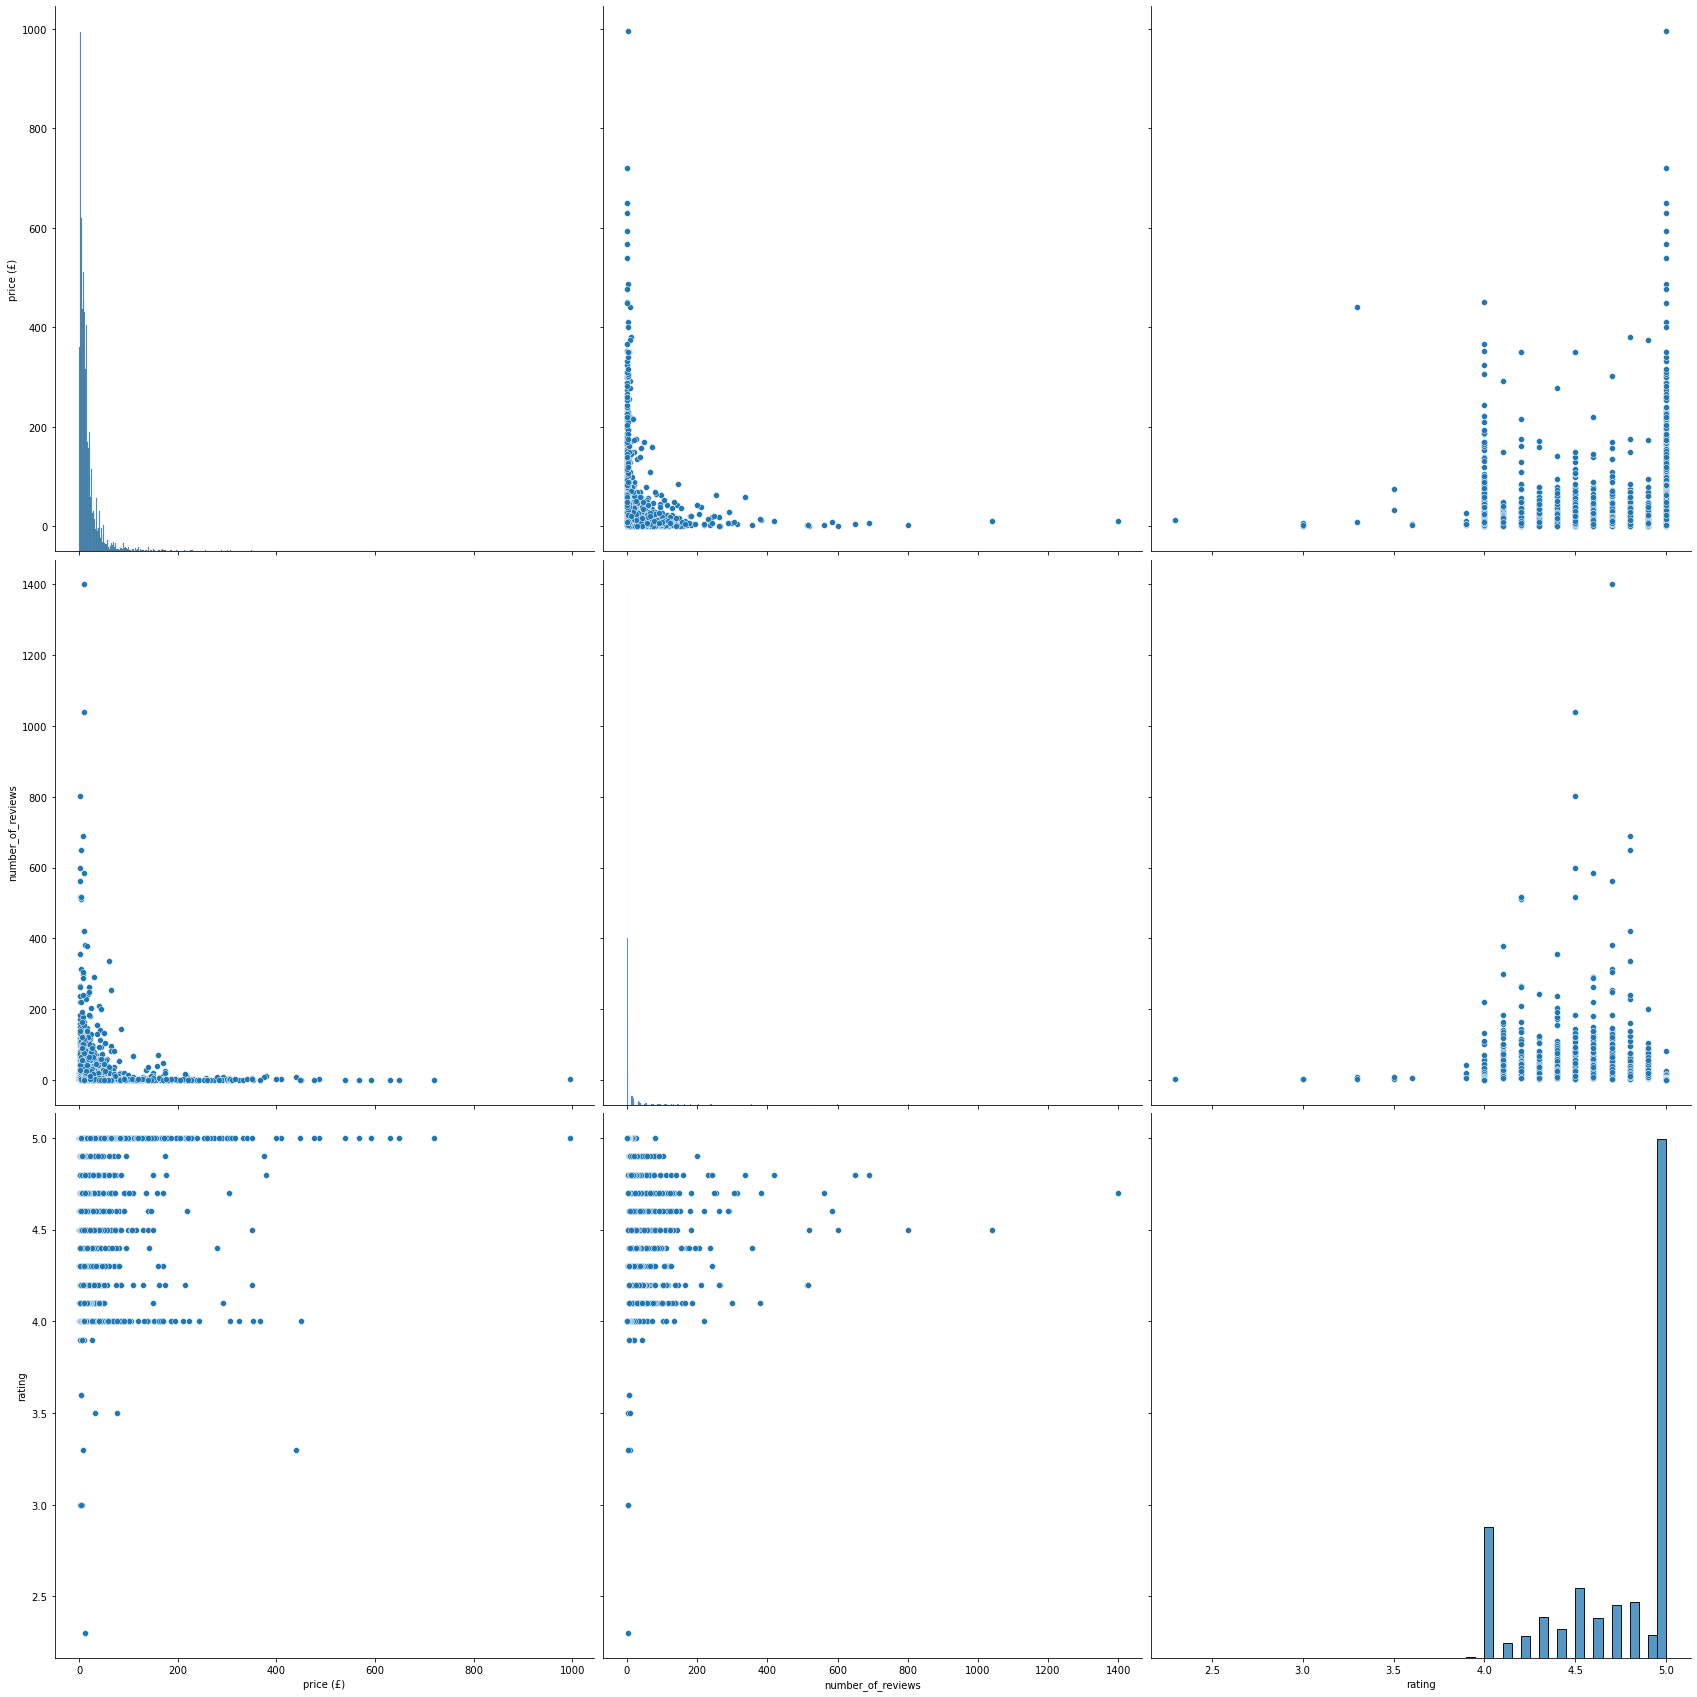

In [68]:
sns.pairplot(dados,height = 8)


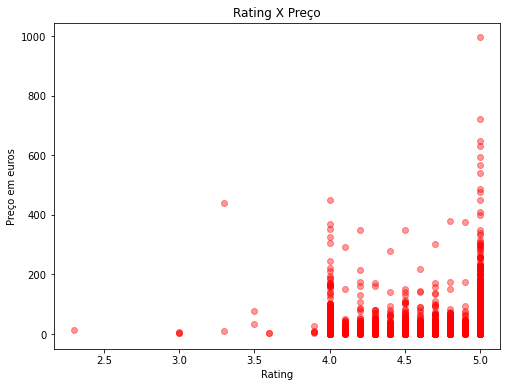

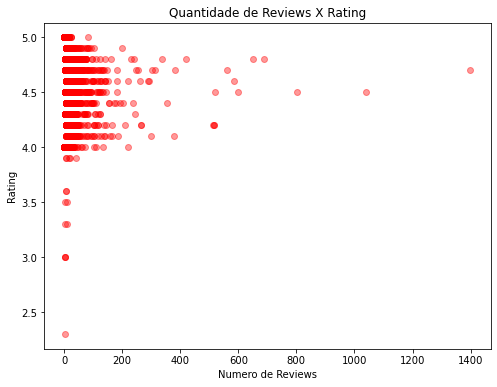

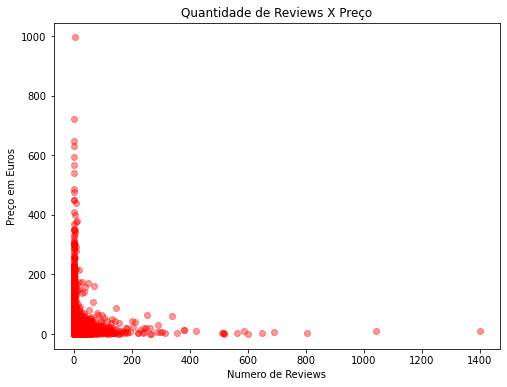

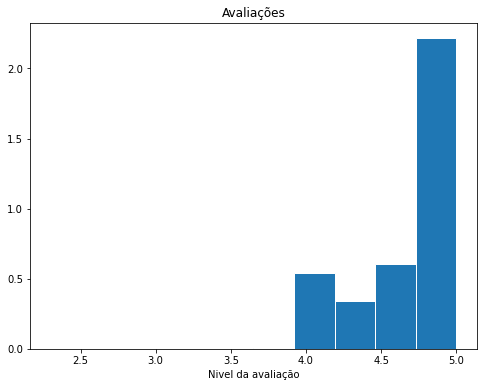

In [54]:

plt.figure(figsize = (8,6))
plt.scatter(dados.rating,dados["price (£)"], c='red', alpha=0.4)
plt.title('Rating X Preço')
plt.xlabel('Rating')
plt.ylabel('Preço em euros')
plt.show()

plt.figure(figsize = (8,6))
plt.scatter(dados.number_of_reviews, dados.rating, c='red', alpha=0.4)
plt.title('Quantidade de Reviews X Rating')
plt.xlabel('Numero de Reviews')
plt.ylabel('Rating')

plt.show()

plt.figure(figsize = (8,6))
plt.scatter(dados.number_of_reviews, dados["price (£)"], c='red', alpha=0.4)
plt.title('Quantidade de Reviews X Preço')
plt.xlabel('Numero de Reviews')
plt.ylabel('Preço em Euros')

plt.figure(figsize = (8,6))
plt.hist(dados.rating, edgecolor = 'white', density = True)
plt.title('Avaliações')
plt.xlabel('Nivel da avaliação')

plt.show()


**Observando os gráficos:** Para a análise dos produtos, nós vamos usar três principais características nos produtos, qualidade, beneficios que traz o produto e o investimento/preço. Nesses gráficos conseguimos ver varias hipóteses diferentes. Uma das hipóteses que vamos usar é que quanto maior o preço melhor é a avaliação, pois quanto mais caro um produto, normalmente ele tem a melhor qualidade e maiores benefícios. A segunda hipótese é que quanto maior quantidade de reviews, pior vai ser o produto, pois, o produto é de menor qualidade ou seja, quanto menos investimento em um produto, pior é a qualidade de beneficios do produto. No ultimo histograma podemos concluir que a maioria das notas são acima de 4.0, ou seja, quase nem existem notas baixas para esse tipo de produto.

[[-0.02257755  5.0508558 ]]
[-3.49699647]


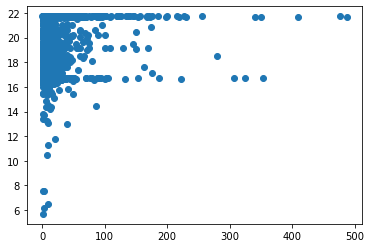

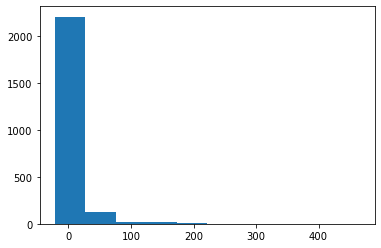

1134.080894781382

In [93]:
dados.columns
x = dados[['number_of_reviews', 'rating']]
y = dados[["price (£)"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model = LinearRegression()
model.fit(x_train, y_train)
print(model.coef_)
print(model.intercept_)
predictions = model.predict(x_test)


plt.scatter(y_test, predictions)
plt.show()
plt.hist(y_test - predictions)
plt.show()

metrics.mean_absolute_error(y_test, predictions)
metrics.mean_squared_error(y_test, predictions)






## 5. Começando o Algorítimo
Neste passo vamos fazer uma regressão linear multivariada, levando em consideração a avaliação em função do preço e número de reviews.

In [55]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [56]:
# Target é a avaliação
y = dados[['price (£)']]

# Vamos usar o preço e número de reviews como features
x = dados[['number_of_reviews', 'rating']]

# Agora vamos fazer MMQ (OLS) com a função regress
resultados = regress(y, x)
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price (£)   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.974
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           4.72e-05
Time:                        18:20:38   Log-Likelihood:                -40588.
No. Observations:                7986   AIC:                         8.118e+04
Df Residuals:                    7983   BIC:                         8.120e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6675      5.583      0.120      0.905     -10.277      11.612
number_of_reviews    -0.0285      0.012     -2.365      0.018      -0.052      -0.005
rating                4.1297      1.179      3.503      0.000       1.819       6.441
==============================================================================
Omnibus:                    11485.500   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4758387.250
Skew:                           8.533   Prob(JB):                         0.00
Kurtosis:                     121.359   Cond. No.                         493.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
X_cp = sm.add_constant(x)

resultados.predict(X_cp)


0       20.475964
1       19.194199
2       16.289319
3       21.287522
4       19.991670
          ...    
7981    21.230581
7982    17.157818
7983    21.287522
7984    21.287522
7985    18.937964
Length: 7986, dtype: float64

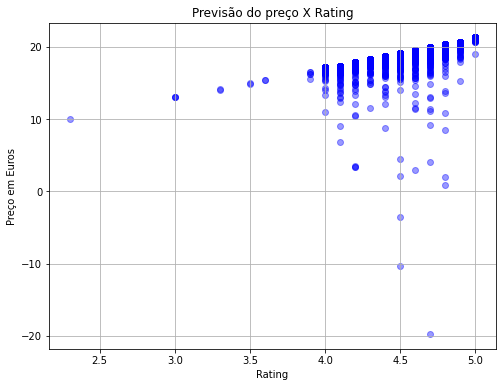

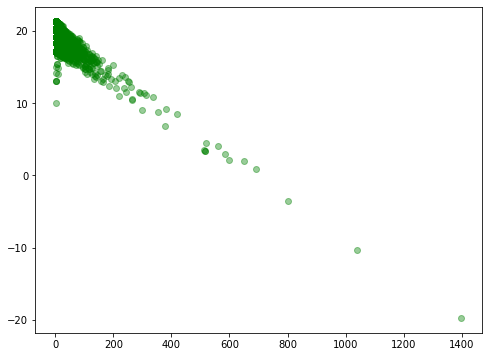

In [41]:
plt.figure(figsize = (8,6))
plt.scatter(dados.rating,resultados.predict(), c='blue', alpha=0.4)
plt.title('Previsão do preço X Rating')
plt.grid(True)
plt.xlabel('Rating')
plt.ylabel('Preço em Euros')

plt.figure(figsize = (8,6))
plt.scatter(dados.number_of_reviews,resultados.predict(), c='green', alpha=0.4)


plt.show()